In [1]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
from pandas.plotting import radviz


In [2]:
csv1 = "hpi-data-2016-complete_data.csv"
csv2 = "HDI_2016_Statistical1.csv"
csv3 = "Human development index (HDI)_historical.csv"


In [3]:
#human happiness complete data 
hpi_complete_data = pd.read_csv(csv1)

#human development index 
hdi_statistical_data = pd.read_csv(csv2)
hdi_historical_data = pd.read_csv(csv3, skiprows=1)

#df_columns = hdi_historical_data.columns
#df_years = df_columns[2:]



In [4]:
# df4 = pd.pivot_table(df2,values='Value', index='Date', columns='Type'])

In [5]:
hdi_historical = hdi_historical_data.dropna(axis=0, how="all").dropna(axis=1, how= "all")

#hdi historical rank sorted
hdi_historical_sorted_rank = hdi_historical.sort_values(by=["HDI Rank (2015)"])
hdi_historical_sorted_rank.head()

,HDI Rank (2015),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
124,1,Norway,0.849,0.855,0.862,0.870,0.884,0.883,0.888,0.895,...,0.934,0.936,0.936,0.936,0.939,0.941,0.942,0.945,0.948,0.949
8,2,Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,...,0.918,0.921,0.925,0.927,0.927,0.930,0.933,0.936,0.937,0.939
162,2,Switzerland,0.831,0.833,0.835,0.840,0.842,0.846,0.853,0.863,...,0.911,0.914,0.916,0.920,0.932,0.932,0.934,0.936,0.938,0.939
63,4,Germany,0.801,0.809,0.814,0.822,0.828,0.834,0.840,0.845,...,0.898,0.903,0.906,0.907,0.912,0.916,0.919,0.920,0.924,0.926
150,5,Singapore,0.718,0.729,0.740,0.751,0.763,0.773,0.783,0.795,...,0.873,0.880,0.887,0.889,0.911,0.917,0.920,0.922,0.924,0.925


In [6]:
#hpi_data.dropna(axis=[0,1], how='all')

#human happiness index dropped NaN
hpi_df = hpi_complete_data.dropna(axis=0, how='all').dropna(axis=1, how='all')
hpi_df.sort_values(by=["HPI Rank"])

,HPI Rank,Country,Region,Average Life Expectancy,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
28,1.0,Costa Rica,Americas,79.1,7.3,48.2,2.8,15%,72.6,6.8,44.7,"$9,733","4,654,148",48.6
79,2.0,Mexico,Americas,76.4,7.3,44.3,2.9,19%,66.3,6.8,40.7,"$9,703","122,070,963",48.1
26,3.0,Colombia,Americas,73.7,6.4,35.1,1.9,24%,63.1,5.7,40.7,"$7,885","46,881,018",53.5
134,4.0,Vanuatu,Asia Pacific,71.3,6.5,34.9,1.9,22%,60.3,5.9,40.6,"$3,158","247,498",Data unavailable
136,5.0,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,19%,64.8,5.2,40.3,"$1,755","88,809,200",38.7
96,6.0,Panama,Americas,77.2,6.9,42.1,2.8,19%,68.3,6.3,39.5,"$10,139","3,743,761",51.9
89,7.0,Nicaragua,Americas,74.3,5.4,29.2,1.4,25%,63.4,4.8,38.7,"$1,780","5,877,034",Data unavailable
7,8.0,Bangladesh,Asia Pacific,70.8,4.7,23.3,0.7,27%,56.6,4.3,38.4,$859,"155,257,387",Data unavailable
122,9.0,Thailand,Asia Pacific,74.1,6.3,38.6,2.7,15%,66.3,6.0,37.3,"$5,918","67,164,130",39.3
36,10.0,Ecuador,Americas,75.4,6.0,34.3,2.2,22%,64.1,5.5,37.0,"$5,702","15,419,493",46.6


In [7]:
#human development index statistical data dropped NaN
hdi_stat = hdi_statistical_data.dropna(axis=0, how='all').dropna(axis=1, how='all')

#merged dataframes-- hdi statistical and hpi on country name
merged_df= pd.merge(hdi_stat, hpi_df, on = "Country")
merged_df

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket,...,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
0,1,Norway,0.949,81.7,17.7,12.7,"67,614",5,1,VERY HIGH HUMAN DEVELOPMENT,...,7.7,57.1,5.0,7%,78.6,7.4,36.8,"$101,564","5,018,573",25.9
1,2,Australia,0.939,82.5,20.4,13.2,"42,822",19,3,VERY HIGH HUMAN DEVELOPMENT,...,7.2,53.1,9.3,8%,78.6,6.9,21.2,"$67,646","22,728,254",Data unavailable
2,2,Switzerland,0.939,83.1,16.0,13.4,"56,364",7,2,VERY HIGH HUMAN DEVELOPMENT,...,7.8,59.3,5.8,6%,79.4,7.6,34.3,"$83,209","7,996,861",31.6
3,4,Germany,0.926,81.1,17.1,13.2,"45,000",13,4,VERY HIGH HUMAN DEVELOPMENT,...,6.7,48.2,5.3,8%,77.6,6.4,29.8,"$44,011","80,425,823",Data unavailable
4,5,Denmark,0.925,80.4,19.2,12.7,"44,519",13,6,VERY HIGH HUMAN DEVELOPMENT,...,7.5,54.4,5.5,7%,76.8,7.2,32.7,"$57,636","5,591,572",29.1
5,7,Netherlands,0.924,81.7,18.1,11.9,"46,326",8,6,VERY HIGH HUMAN DEVELOPMENT,...,7.5,57.0,5.3,4%,78.2,7.5,35.3,"$49,475","16,754,962",28.0
6,8,Ireland,0.923,81.1,18.6,12.3,"43,798",11,8,VERY HIGH HUMAN DEVELOPMENT,...,7.0,50.3,5.6,8%,77.5,6.7,30.0,"$48,977","4,586,897",32.5
7,9,Iceland,0.921,82.7,19.0,12.2,"37,065",20,9,VERY HIGH HUMAN DEVELOPMENT,...,7.6,58.0,6.4,5%,79.8,7.4,31.1,"$44,259","320,716",26.9
8,10,Canada,0.920,82.2,16.3,13.1,"42,582",12,9,VERY HIGH HUMAN DEVELOPMENT,...,7.4,53.9,8.2,9%,77.8,7.1,23.9,"$52,738","34,751,476",Data unavailable
9,13,New Zealand,0.915,82.0,19.2,12.5,"32,870",20,13,VERY HIGH HUMAN DEVELOPMENT,...,7.2,52.7,5.6,8%,77.7,6.9,31.3,"$39,505","4,408,100",Data unavailable


In [8]:
merged_df['Gross national income (GNI) per capita'] = pd.to_numeric(merged_df['Gross national income (GNI) per capita'].str.replace(",",""))
merged_df
#merged_df'Gross national income (GNI) per capita'] = merged_df['Gross national income (GNI) per capita'].str.replace(",","")
#####merge hdi statistical with GNH (gross national happiness) index by country name. 

,HDI rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Development Bucket,...,Average Wellbeing (0-10),Happy Life Years,Footprint (gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita ($PPP),Population,GINI index
0,1,Norway,0.949,81.7,17.7,12.7,67614,5,1,VERY HIGH HUMAN DEVELOPMENT,...,7.7,57.1,5.0,7%,78.6,7.4,36.8,"$101,564","5,018,573",25.9
1,2,Australia,0.939,82.5,20.4,13.2,42822,19,3,VERY HIGH HUMAN DEVELOPMENT,...,7.2,53.1,9.3,8%,78.6,6.9,21.2,"$67,646","22,728,254",Data unavailable
2,2,Switzerland,0.939,83.1,16.0,13.4,56364,7,2,VERY HIGH HUMAN DEVELOPMENT,...,7.8,59.3,5.8,6%,79.4,7.6,34.3,"$83,209","7,996,861",31.6
3,4,Germany,0.926,81.1,17.1,13.2,45000,13,4,VERY HIGH HUMAN DEVELOPMENT,...,6.7,48.2,5.3,8%,77.6,6.4,29.8,"$44,011","80,425,823",Data unavailable
4,5,Denmark,0.925,80.4,19.2,12.7,44519,13,6,VERY HIGH HUMAN DEVELOPMENT,...,7.5,54.4,5.5,7%,76.8,7.2,32.7,"$57,636","5,591,572",29.1
5,7,Netherlands,0.924,81.7,18.1,11.9,46326,8,6,VERY HIGH HUMAN DEVELOPMENT,...,7.5,57.0,5.3,4%,78.2,7.5,35.3,"$49,475","16,754,962",28.0
6,8,Ireland,0.923,81.1,18.6,12.3,43798,11,8,VERY HIGH HUMAN DEVELOPMENT,...,7.0,50.3,5.6,8%,77.5,6.7,30.0,"$48,977","4,586,897",32.5
7,9,Iceland,0.921,82.7,19.0,12.2,37065,20,9,VERY HIGH HUMAN DEVELOPMENT,...,7.6,58.0,6.4,5%,79.8,7.4,31.1,"$44,259","320,716",26.9
8,10,Canada,0.920,82.2,16.3,13.1,42582,12,9,VERY HIGH HUMAN DEVELOPMENT,...,7.4,53.9,8.2,9%,77.8,7.1,23.9,"$52,738","34,751,476",Data unavailable
9,13,New Zealand,0.915,82.0,19.2,12.5,32870,20,13,VERY HIGH HUMAN DEVELOPMENT,...,7.2,52.7,5.6,8%,77.7,6.9,31.3,"$39,505","4,408,100",Data unavailable


In [9]:
country_group=merged_df.groupby("Region")["Country"]
country_group = country_group.value_counts()
country_group.index


MultiIndex(levels=[['Americas', 'Asia Pacific', 'Europe', 'Middle East and North Africa', 'Post-communist', 'Sub Saharan Africa'], ['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 

In [10]:
df_indexed = merged_df.set_index(["Region","Country"])

x= df_indexed["Life expectancy at birth"]
y=df_indexed['Happy Planet Index']
 

# sub_saharan_africa = ride_sharing_df.loc[ride_sharing_df["City Type"] == "Urban"]

# suburban = ride_sharing_df.loc[ride_sharing_df["City Type"] == "Suburban"]

# rural = ride_sharing_df.loc[ride_sharing_df["City Type"] == "Rural"]

In [11]:
new_index = df_indexed.reset_index()
new_index.columns


#Americas, Asia Pacific,Europe,Middle East and North Africa,Post-communist ,Sub Saharan Africa 

Index(['Region', 'Country', 'HDI rank', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling ',
       'Mean years of schooling', 'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank.1',
       'Development Bucket', 'HPI Rank', 'Average Life \nExpectancy',
       'Average Wellbeing\n(0-10)', 'Happy Life Years',
       'Footprint\n(gha/capita)', 'Inequality of Outcomes',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing',
       'Happy Planet Index', ' GDP/capita\n($PPP) ', 'Population',
       'GINI index'],
      dtype='object')

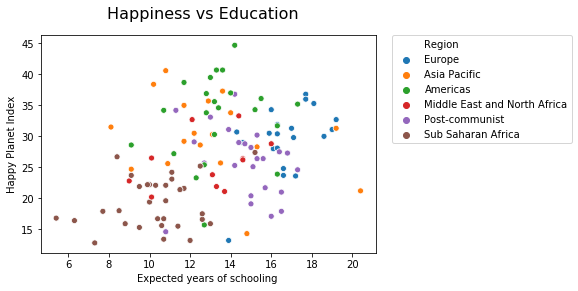

In [17]:
sns.scatterplot(x='Expected years of schooling ',y='Happy Planet Index', data= new_index, hue="Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Happiness vs Education", size = 16)

#name the image file to save figure 
save_image = None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

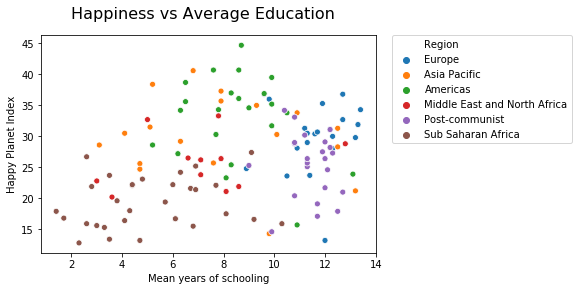

In [18]:
sns.scatterplot(x='Mean years of schooling',y='Happy Planet Index', data= new_index, hue="Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Happiness vs Average Education", size = 16)

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

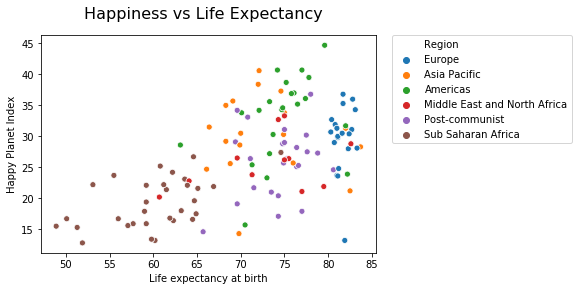

In [19]:
sns.scatterplot(x='Life expectancy at birth',y='Happy Planet Index', data= new_index, hue="Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Happiness vs Life Expectancy", size = 16)

#name the image file to save figure 
save_image = None 

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

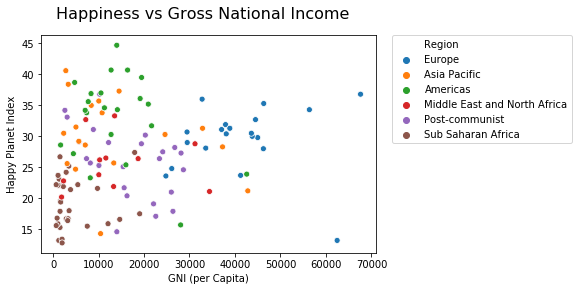

In [20]:
sns.scatterplot(x='Gross national income (GNI) per capita',y='Happy Planet Index', data= new_index, hue="Region" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Happiness vs Gross National Income", size = 16)
plt.xlabel("GNI (per Capita)")

#name the image file to save figure 
save_image = None

if save_image is not None:
    plt.savefig(save_image)
    plt.close(save_image)
else:
    plt.show()

Text(0,0.5,'Happiness Index')

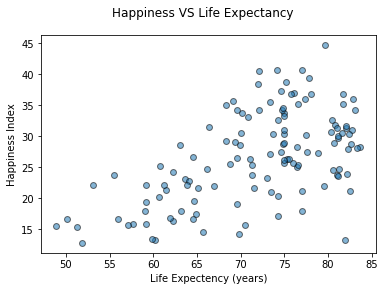

In [21]:
plt.scatter(x,y, alpha=.55, s=35, edgecolors="black")
plt.suptitle("Happiness VS Life Expectancy")

plt.xlabel("Life Expectency (years)")
plt.ylabel("Happiness Index")

In [ ]:
x_exp_school= df_indexed['Expected years of schooling ']
plt.scatter(x_exp_school,y, alpha=.55, s=35, edgecolors="black")
plt.suptitle("Happiness VS Expected Years of schooling")

plt.xlabel("Expected Education(years)")
plt.ylabel("Happiness Index")








In [ ]:
x_gni_per_capita = df_indexed['Gross national income (GNI) per capita']
plt.scatter(x_gni_per_capita,y, alpha=.55, s=35, edgecolors="black")
plt.suptitle("Happiness VS Gross National Income(Per Capita)")

plt.xlabel("Gross National Income per Capita")
plt.ylabel("Happiness Index")


In [ ]:
df3 = hdi_data[["Human Development Index (HDI) ","Gross national income (GNI) per capita"]]
df3 = df3.set_index('Gross national income (GNI) per capita')
df3 = df3.sort_index(ascending=True)
df3 = df3.reset_index()
df3['Gross national income (GNI) per capita'] = df3['Gross national income (GNI) per capita'].str.replace(',','').astype('float')
df3.plot(x='Gross national income (GNI) per capita',y="Human Development Index (HDI) ",kind='scatter')